In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
%pwd

'C:\\Users\\gabri\\Dropbox\\General Assembly\\projects\\capstone\\GA-TOR-Jabberwocky-Capstone-Project-main'

In [4]:
%ls

 Volume in drive C is Local Disk
 Volume Serial Number is AAFC-6767

 Directory of C:\Users\gabri\Dropbox\General Assembly\projects\capstone\GA-TOR-Jabberwocky-Capstone-Project-main

11/19/2020  18:04    <DIR>          .
11/19/2020  18:04    <DIR>          ..
11/10/2020  10:29             1,799 .gitignore
11/13/2020  15:41    <DIR>          .ipynb_checkpoints
11/19/2020  17:49             3,040 2.2
11/10/2020  10:29           139,590 check_in_2.ipynb
11/18/2020  16:17             6,614 download.png
11/19/2020  14:27           240,025 load_model.ipynb
11/13/2020  15:05         1,314,688 model.h5
11/19/2020  14:26        11,026,330 model.pkl
11/17/2020  20:35        11,062,592 model_2.h5
11/19/2020  18:04            33,056 modeling.ipynb
11/19/2020  13:36             9,360 prediction.png
11/10/2020  10:29                37 README.md
              11 File(s)     23,837,131 bytes
               3 Dir(s)  287,365,455,872 bytes free


In [5]:
# Keras and Tensorflow

np.random.seed(42)

# import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras import utils
from keras.callbacks import EarlyStopping

 

In [ ]:
# import sys
# !{sys.executable} -m pip uninstall tensorflow

In [5]:
data = pd.read_csv('../datasets/train.csv')
data.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [7]:
data['emotion'].value_counts(normalize = True)

3    0.251315
6    0.172942
4    0.168240
2    0.142708
0    0.139155
5    0.110453
1    0.015187
Name: emotion, dtype: float64

In [6]:
def image_preprocessor(data_pixel_column):
    processed_column = data_pixel_column.apply(lambda x : np.fromstring(x,dtype = float, sep = ' ')).apply(lambda x : np.reshape(x, (48,48)))
    
    image_array_prep = np.zeros(shape=(processed_column.shape[0], 48, 48))
    for index, image in enumerate(processed_column):
        image_array_prep[index] = image
        
    return image_array_prep

In [7]:
image_array = image_preprocessor(data.loc[:,'pixels'])


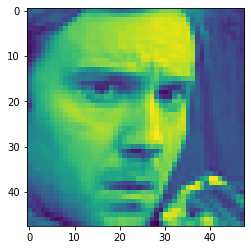

In [8]:
plt.imshow(image_array[0])

In [10]:
image_array

array([[[ 70.,  80.,  82., ...,  52.,  43.,  41.],
        [ 65.,  61.,  58., ...,  56.,  52.,  44.],
        [ 50.,  43.,  54., ...,  49.,  56.,  47.],
        ...,
        [ 91.,  65.,  42., ...,  72.,  56.,  43.],
        [ 77.,  82.,  79., ..., 105.,  70.,  46.],
        [ 77.,  72.,  84., ..., 106., 109.,  82.]],

       [[151., 150., 147., ..., 129., 140., 120.],
        [151., 149., 149., ..., 122., 141., 137.],
        [151., 151., 156., ..., 109., 123., 146.],
        ...,
        [188., 188., 121., ..., 185., 185., 186.],
        [188., 187., 196., ..., 186., 182., 187.],
        [186., 184., 185., ..., 193., 183., 184.]],

       [[231., 212., 156., ...,  44.,  27.,  16.],
        [229., 175., 148., ...,  27.,  35.,  27.],
        [214., 156., 157., ...,  28.,  22.,  28.],
        ...,
        [241., 245., 250., ...,  57., 101., 146.],
        [246., 250., 252., ...,  78., 105., 162.],
        [250., 251., 250., ...,  88., 110., 152.]],

       ...,

       [[ 74.,  81.,  87

In [11]:
X_train, X_test, y_train, y_test = train_test_split(image_array, data.loc[:,'emotion'], random_state = 42, stratify = data.loc[:,'emotion'])

In [12]:
X_train.shape

(21531, 48, 48)

In [13]:
X_test

array([[[ 19.,   7.,  13., ...,  34.,  43.,  53.],
        [ 14.,   8.,  14., ...,  25.,  39.,  48.],
        [ 15.,  11.,  13., ...,  22.,  30.,  37.],
        ...,
        [  6.,   6.,   6., ...,   6.,   6.,   6.],
        [  6.,   5.,   5., ...,   6.,   6.,   6.],
        [  6.,   6.,   6., ...,   5.,   6.,   7.]],

       [[ 93.,  91.,  96., ..., 112.,  99.,  93.],
        [ 95.,  99., 100., ..., 107., 106.,  93.],
        [ 93., 100., 101., ..., 107., 114., 108.],
        ...,
        [111., 143., 222., ...,  50.,  52.,  59.],
        [111., 106., 146., ...,  50.,  55.,  54.],
        [109., 106., 103., ...,  50.,  55.,  52.]],

       [[249., 213., 169., ...,  51.,  56.,  64.],
        [228., 221., 173., ...,  52.,  63.,  71.],
        [229., 222., 185., ...,  59.,  63.,  42.],
        ...,
        [255., 255., 254., ...,  80.,  61.,  59.],
        [255., 255., 255., ...,  45.,  48.,  57.],
        [255., 255., 255., ...,  42.,  54.,  50.]],

       ...,

       [[229., 222., 170

In [14]:
X_train /= 255
X_test /= 255

In [15]:
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [16]:
y_train = utils.to_categorical(y_train.to_numpy(), num_classes=y_train.nunique())
y_test = utils.to_categorical(y_test.to_numpy(), num_classes=y_test.nunique())

In [17]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [18]:
model = Sequential()

model.add(Conv2D(64,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu',
                 input_shape = (48,48,1)))

model.add(Conv2D(32,
                 kernel_size=(3,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size = 3))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.125))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation = 'softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               921728    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1

In [20]:
# Compile model.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# datagen = ImageDataGenerator(
#     horizontal_flip=True)

# datagen.fit(X_train)

In [21]:
early_stop = EarlyStopping(monitor = 'val_accuracy',
                           patience = 5,
                           min_delta = 0.01,
                           restore_best_weights = True)

# Fit model on training data.
history = model.fit(X_train,
                    y_train, 
                    batch_size=512,
                    validation_data=(X_test, y_test),
                    epochs=200,
                    callbacks = [early_stop])

Epoch 1/200
 9/43 [=====>........................] - ETA: 1:07 - loss: 1.8810 - accuracy: 0.2164

KeyboardInterrupt: 

In [ ]:
model.predict(X_test)

In [ ]:
history.history

In [ ]:
X_test.shape

In [ ]:
X_test[0].shape

In [ ]:
# model.save('model_2.h5')

In [ ]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Acc', color='#185fad')
plt.plot(test_loss, label='Testing Acc', color='orange')

# Set title
plt.title('Training and Testing Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(np.arange(18), np.arange(18))

plt.legend(fontsize = 18);